In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'airline_price_dataset.csv')

In [3]:
df.head(30)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:
df.tail(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.flight.value_counts()
#remove flight col as it has many flight names.This col has ir relevent values.mb we can slice country names and put them in
#new col with values uk,sg,IND.IT is used to plot count plot.

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.columns[0]
#WHen the col name has space in between it it is difficult to mention it in columns para of drop fun.
#So type df.columns[0].based on index position i access the value.

'Unnamed: 0'

In [9]:
df.drop(columns=[df.columns[0], 'flight'],inplace=True)

In [10]:
df.shape

(300153, 10)

In [11]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [13]:
df.days_left.value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

In [14]:
df.price.value_counts()

price
54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
12014       1
26912       1
20145       1
25462       1
7533        1
Name: count, Length: 12157, dtype: int64

### EDA

In [34]:
import matplotlib.pyplot as plt

In [35]:
df1=df.copy()

In [ ]:
#Using crosstab to plot bar chart for two categorical columns

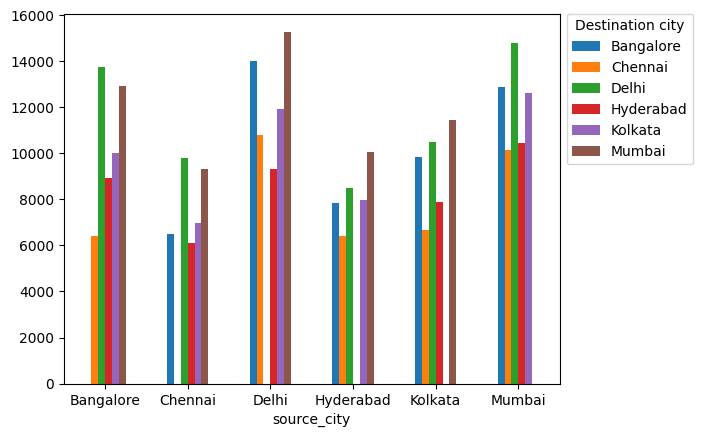

In [36]:
#Bar plot between source city and destination city
crosstb = pd.crosstab(df1.source_city, df1.destination_city)
barplot = crosstb.plot.bar(rot=0)
barplot.legend(title='Destination city', bbox_to_anchor=(1, 1.02), loc='upper left')

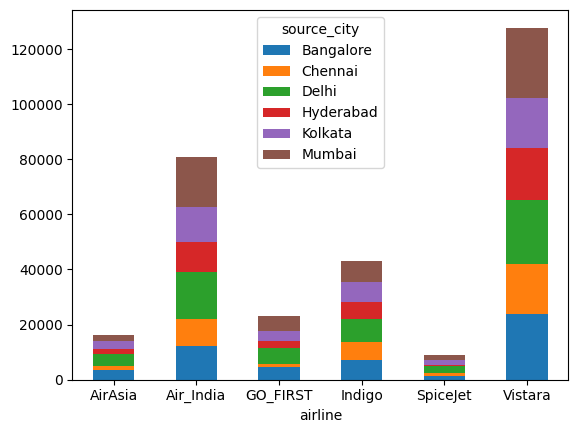

In [37]:
#Stacked Bar plot between airline and source city
crosstb_1 = pd.crosstab(df1.airline, df1.source_city)
pl = crosstb_1.plot(kind="bar", stacked=True, rot=0)

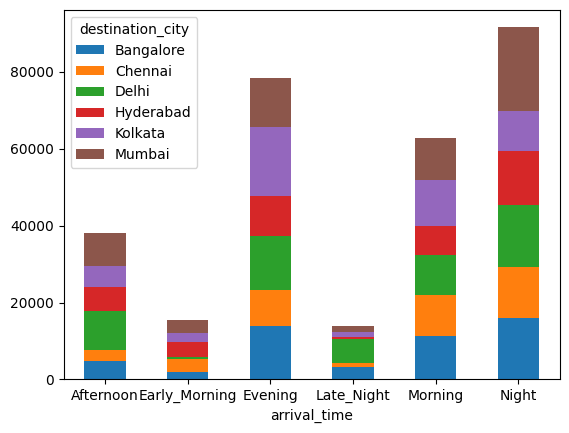

In [38]:
#Stacked Bar plot between arrival time and destination city
crosstb_2 = pd.crosstab(df1.arrival_time, df1.destination_city)
pl_1 = crosstb_2.plot(kind="bar", stacked=True, rot=0)

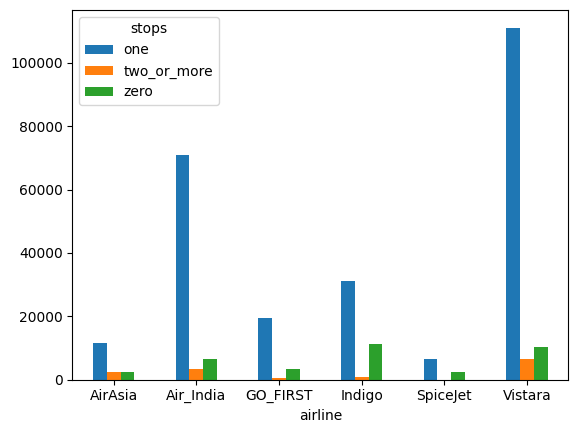

In [39]:
#Bar plot between airline and stops
crosstb_1 = pd.crosstab(df1.airline, df1.stops)
barplot_1 = crosstb_1.plot.bar(rot=0)

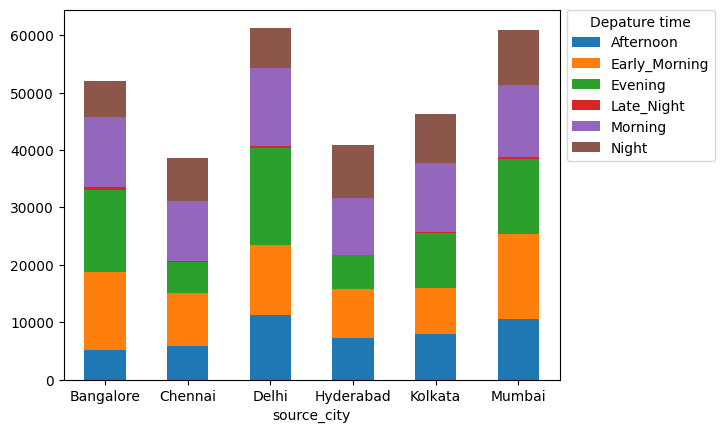

In [40]:
#Stacked Bar plot between source city and depature time.
crosstb_2 = pd.crosstab(df1.source_city, df1.departure_time)
barplot_2 = crosstb_2.plot(kind="bar", stacked=True, rot=0,)
barplot_2.legend(title='Depature time', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
plt.bar()

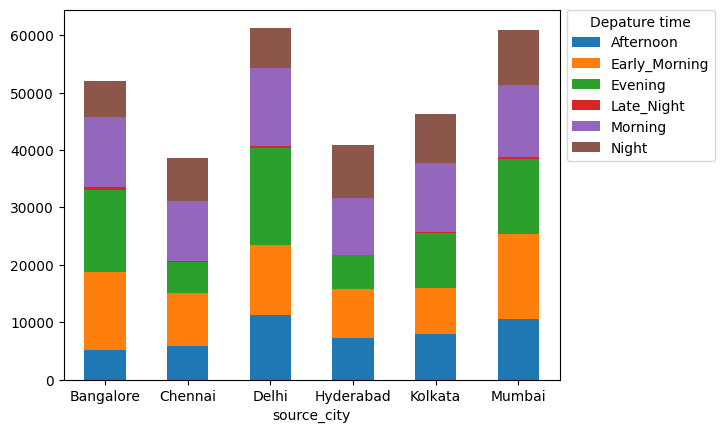

In [41]:
#Stacked Bar plot between source city and depature time.
crosstb_2 = pd.crosstab(df1.source_city, df1.departure_time)
barplot_2 = crosstb_2.plot(kind="bar", stacked=True, rot=0)
barplot_2.legend(title='Depature time', bbox_to_anchor=(1, 1.02), loc='upper left')

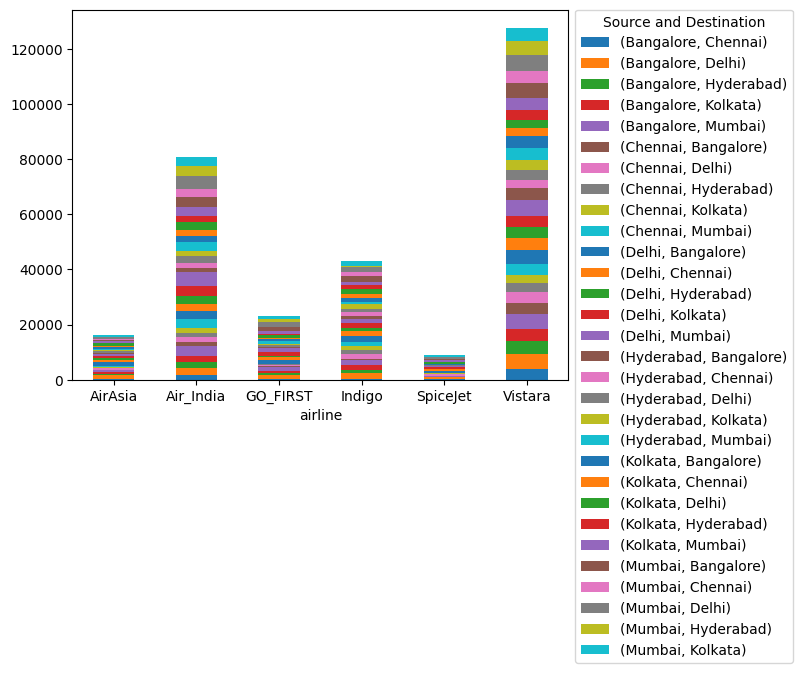

In [42]:
#Bar plot for more than two categorical columns. airline , source ciry and destination city.
crosstb_3 = pd.crosstab(df1.airline, [df1.source_city,df1.destination_city])
bar = crosstb_3.plot(kind="bar", stacked=True, rot=0)
bar.legend(title='Source and Destination', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
#SCATTER PLOT

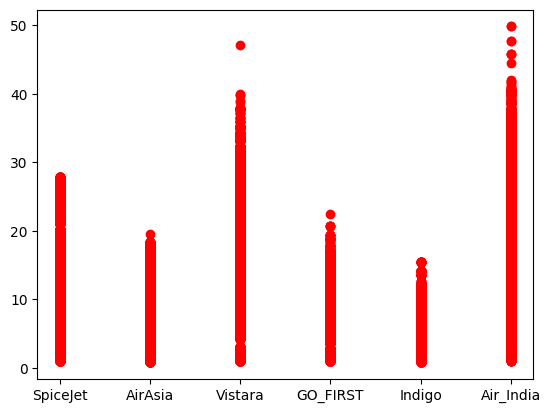

In [43]:
#Scatter plot for airline and duration
plt.scatter(df1['airline'], df1['duration'], c ="red")
plt.show()

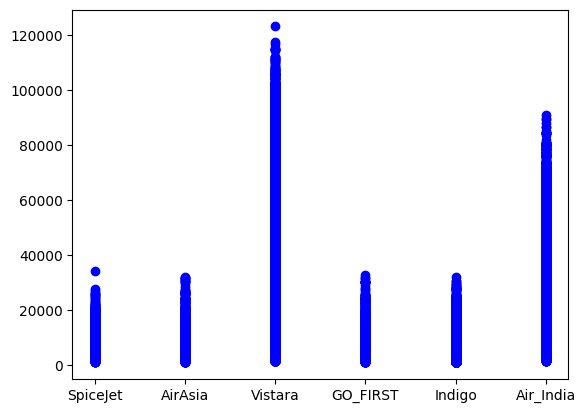

In [44]:
#Scatter plot for airline and price
plt.scatter(df1['airline'], df1['price'], c ="blue")
plt.show()

In [ ]:
#COUNT PLOT

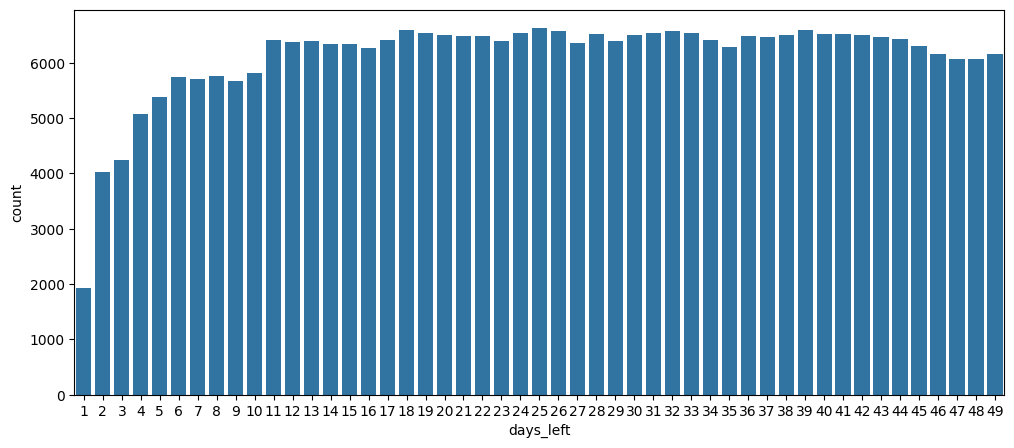

In [46]:
#Count plot for days left column
plt.figure(figsize=(12,5))
sns.countplot(x ='days_left', linewidth = 0, data = df1)
plt.show()

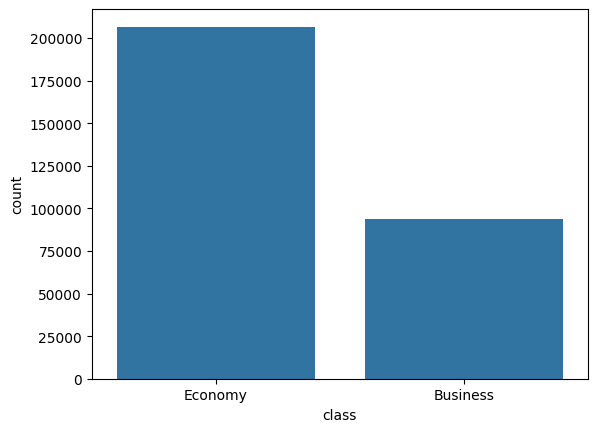

In [48]:
#Count plot for class column
sns.countplot(x ='class', data = df1)
plt.show()

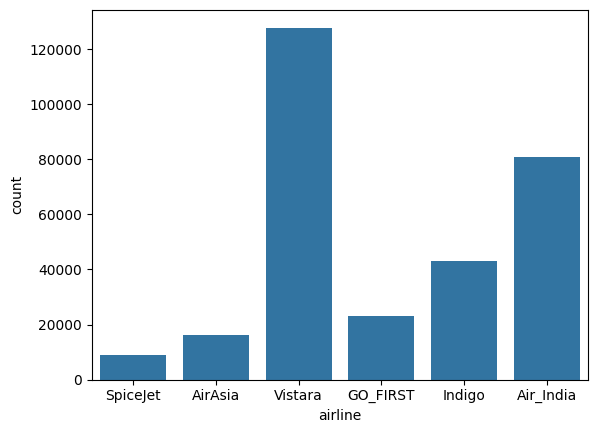

In [49]:
#Count plot for airline column
sns.countplot(x ='airline', data = df1)
plt.show()

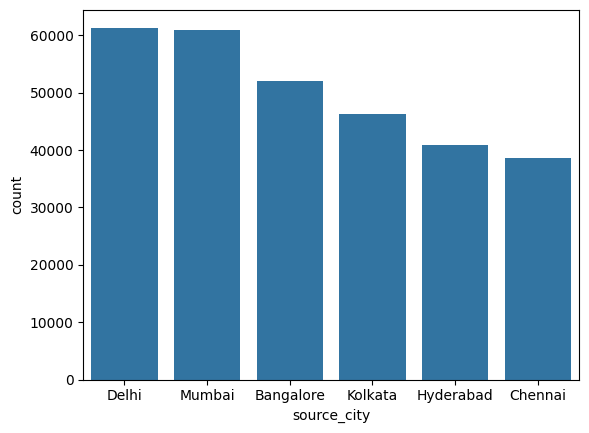

In [50]:
#Count plot for source city column
sns.countplot(x ='source_city', data = df1)
plt.show()

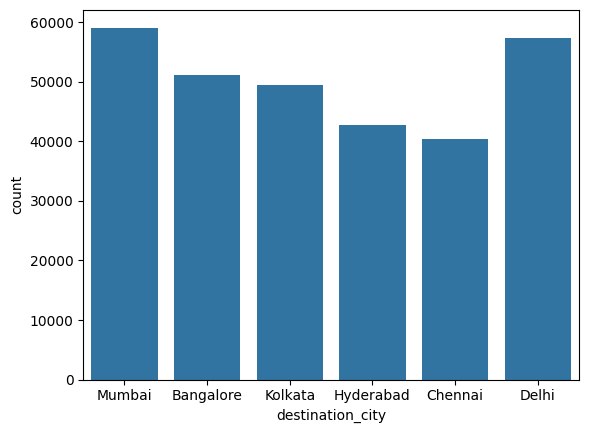

In [51]:
#Count plot for destination city column
sns.countplot(x ='destination_city', data = df1)
plt.show()

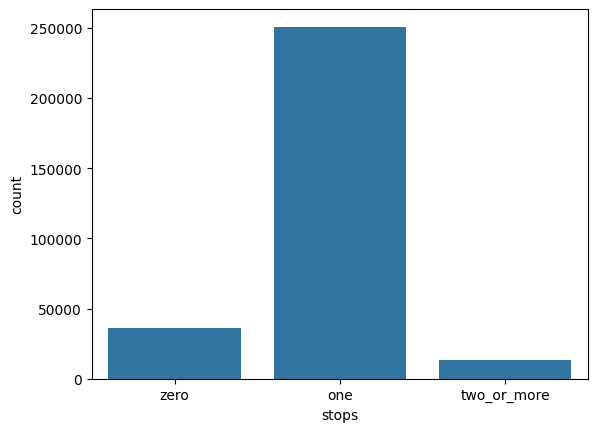

In [52]:
#Count plot for stops column
sns.countplot(x ='stops', data = df1)
plt.show()

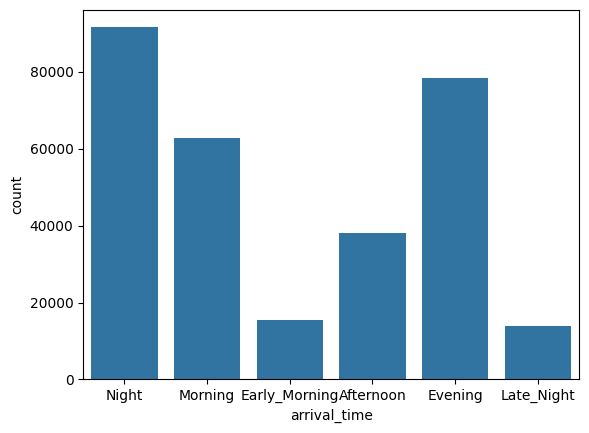

In [53]:
#Count plot for arrival time column
sns.countplot(x ='arrival_time', data = df1)
plt.show()

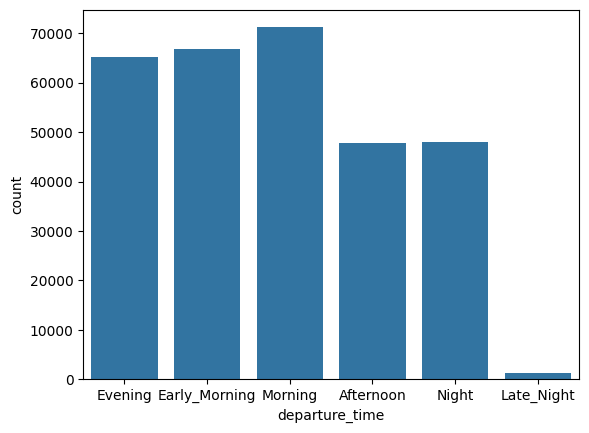

In [54]:
#count plot for depature time column
sns.countplot(x ='departure_time', data = df1)
plt.show()

In [15]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

### Scaling, Feature Selection and TTS

In [16]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [17]:
df_cat=df.select_dtypes(include=[object])
df_cat

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [18]:
mn=MinMaxScaler()
c=mn.fit_transform(df_num)
df_num_mn=pd.DataFrame(c,columns=df_num.columns)
df_num_mn

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765
...,...,...,...
300148,0.188776,1.0,0.558844
300149,0.195714,1.0,0.623124
300150,0.265306,1.0,0.639473
300151,0.187143,1.0,0.659856


In [20]:
dummy=pd.get_dummies(data=df_cat,drop_first=False,dtype='int')
dummy

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
300149,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
300150,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [21]:
df_pre=pd.concat([dummy,df_num_mn],axis=1)
df_pre
#rule:always concat scaled num vars then concat dummy vars
#tv must be at the last 
#here as price is there in scaled var its ok to concat dummy var then concat scaled vars
#but remember the rule

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left,price
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0.027347,0.0,0.039749
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0.030612,0.0,0.039749
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0.027347,0.0,0.039773
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.028980,0.0,0.039765
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0.188776,1.0,0.558844
300149,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0.195714,1.0,0.623124
300150,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0.265306,1.0,0.639473
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0.187143,1.0,0.659856


In [22]:
x=df_pre.iloc[:, :37]
x

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.027347,0.0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.030612,0.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0.027347,0.0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.028980,0.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.030612,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0.188776,1.0
300149,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0.195714,1.0
300150,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0.265306,1.0
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0.187143,1.0


In [23]:
y=df_pre.iloc[:,[-1]]
y

,price
0,0.039749
1,0.039749
2,0.039773
3,0.039765
4,0.039765
...,...
300148,0.558844
300149,0.623124
300150,0.639473
300151,0.659856


In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=50,test_size=0.30,shuffle=True)

In [ ]:
X_train.sort_index(ascending=True,inplace=True)
X_train

In [ ]:
y_train.sort_index(ascending=True,inplace=True)
y_train

In [ ]:
X_test.sort_index(ascending=True,inplace=True)
X_test

In [ ]:
y_test.sort_index(ascending=True,inplace=True)
y_test

### Linear Regression

In [25]:
import statsmodels.api as sm
MLR_model1=sm.OLS(y_train, X_train).fit()
print(MLR_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 6.134e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:57:51   Log-Likelihood:             3.0923e+05
No. Observations:              210107   AIC:                        -6.184e+05
Df Residuals:                  210071   BIC:                        -6.180e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
airline_AirAsia 

In [26]:
y_test_pred=MLR_model1.predict(X_test)
y_test_pred.count()


90046

In [27]:
y_test_pred

282455    0.418593
167770    0.043085
10279     0.061430
258794    0.372640
228763    0.414604
            ...   
10907     0.065645
174731    0.058947
218101    0.323799
239163    0.410997
95241     0.065009
Length: 90046, dtype: float64

In [28]:
#MSE manually

(y_test['price']-y_test_pred)**2
np.sum((y_test['price']-y_test_pred)**2)

272.4334953090379

In [29]:
272/len(y_test['price'])

0.003020678319969793

In [ ]:
#MEAN SQUARED ERROR

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=y_test['price'],y_pred=y_test_pred)

0.0030254924739470702

In [ ]:
#RMSE is  0.003

In [ ]:
np.sqrt(0.003)

In [ ]:
#R SQUARED VALUE

In [31]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test['price'],y_pred=y_test_pred)

0.9128067280540202

In [ ]:
#MAE VALUE MANUALLY

In [32]:
np.mean(abs(y_test['price']-y_test_pred))

0.03730903482005584

In [ ]:
#MEAN ABSOLUTE ERROR

In [33]:
mean_absolute_error(y_test['price'],y_test_pred)

0.03730903482005584

In [ ]:
#The MSE value is 0.03, which is nearly 0, the MAE value is 0.03, which is nearly 0 and the R squared value is 0.9, which is
# nearly 1. Hence, the OLS model is a good model.

### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt_reg=DecisionTreeRegressor(criterion='squared_error',min_samples_split=2,min_samples_leaf=1,random_state=10)

In [57]:
dtree=dt_reg.fit(X_train,y_train)

In [58]:
dtree

DecisionTreeRegressor(random_state=10)

In [59]:
y_test_pred=dtree.predict(X_test)

In [60]:
y_test_pred

array([0.45584015, 0.03669055, 0.08539265, ..., 0.2203155 , 0.40800715,
       0.07931719])

In [61]:
y_test.head(2)

,price
282455,0.455840
167770,0.013381


In [62]:
y_test_pred[1]

0.03669055310496368

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
mean_squared_error(y_true=y_test.price,y_pred=y_test_pred)

0.0008315842933515337

In [66]:
mean_absolute_error(y_true=y_test.price,y_pred=y_test_pred)

0.009773728679161146

In [63]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test.price, y_pred=y_test_pred)

0.9760341312825641

### Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)

In [70]:
rf.fit(X_train, y_train)

C:\Users\dhana\AppData\Local\Temp\ipykernel_3960\2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [72]:
y_pred = rf.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
R^2 Score: 0.99
